In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fftpack

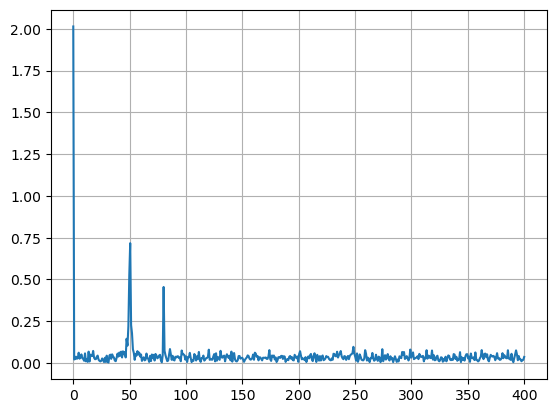

In [2]:
#### EXAMPLE FROM SCIPY FFT TUTORIAL

# Number of sample points
N = 1000
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) + 2.0*np.random.rand(N)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
#plt.show()

(0.0, 1.0)

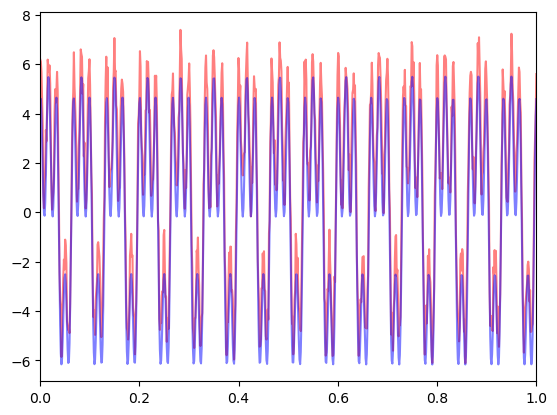

In [3]:
# FUNCTION.PY (given to the students)

t_start = 0
t_stop = 4.0*np.pi

N_samples = 10000

dt = (t_stop-t_start)/N_samples

t = np.linspace(0,N_samples*dt,N_samples,endpoint=False)

fx = 4.0*np.sin(30.0*np.pi*t) + 1.5*np.cos(60.0*np.pi*t) + 3.0*np.cos(120.0*np.pi*t)
fx_noisy = fx + 2.0*np.random.rand(N_samples)

plt.plot(t,fx_noisy,'r-',alpha=0.5)
plt.plot(t,fx,'b',alpha=.5)

plt.xlim(0,1)

(0.0, 100.0)

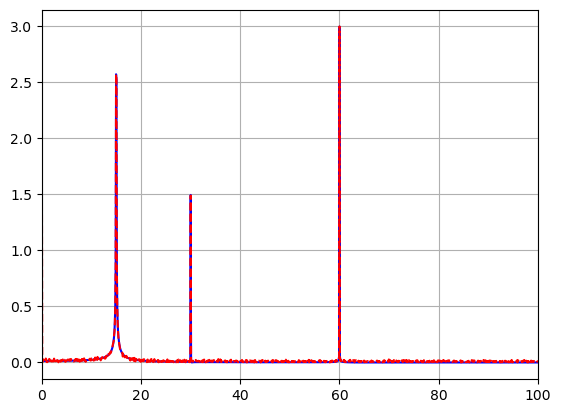

In [4]:
# FFT of our functions
# FFT returns N_samples, but only the first half of the samples are worth looking at (real freqs.)
yf = scipy.fftpack.fft(fx)
yf_noisy = scipy.fftpack.fft(fx_noisy)

# we only need half of the number of samples
xf = np.linspace(0.0, 1.0/(2.0*dt), N_samples//2)

# plot only first half of the transformed array
plt.plot(xf, 2.0/N_samples * np.abs(yf[0:N_samples//2]),'b-')
plt.plot(xf, 2.0/N_samples * np.abs(yf_noisy[0:N_samples//2]),'r--')
plt.grid()
plt.xlim(0,100)

## NOTE

Everything below this is experimentation for the in-class assignment.  I was just messing around, so some of this is going to be very weird.


397.88735772973837 397.88735772973837


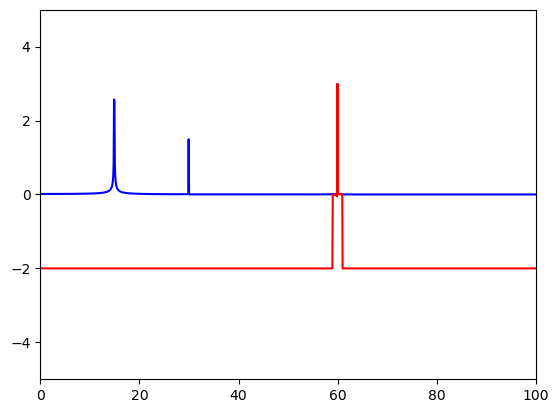

In [5]:
yfr = scipy.fftpack.rfft(fx)
yfr_noisy = scipy.fftpack.rfft(fx_noisy)

xf = np.linspace(0.0, 1.0/(2.0*dt), N_samples//2)

plt.plot(xf,2.0/N_samples * np.abs(yfr[1::2]),'b-')
plt.xlim(0,100)

print(xf.max(),1e4/(8.0*np.pi))

xfmax = 1.0/(2.0*dt)

dxf = xfmax/N_samples   

f_low = 59.0
f_high = 61.0

N_low = int(f_low/dxf)
N_high = int(f_high/dxf)

yfr_copy = np.copy(yfr)
yfr_copy[0:N_low] = -N_samples  # should prob. be zero; just screwing arund.
yfr_copy[N_high:] = -N_samples

plt.plot(xf,2.0/N_samples * yfr_copy[1::2],'r-')
plt.ylim(-5,5)


yfr_filtered = np.copy(yfr)

yfr_filtered[0:N_low] = 0.0
yfr_filtered[N_high:] = 0.0


fxr_filtered = scipy.fftpack.irfft(yfr_filtered)


In [6]:
print(yfr_filtered[yfr_filtered>0.0])


[1.38018851e+00 1.47529933e+00 1.58780060e+00 1.72291838e+00
 1.88820603e+00 2.09500196e+00 2.36114021e+00 2.71637943e+00
 3.21437013e+00 3.96265260e+00 5.21300829e+00 7.72529402e+00
 1.53537601e+01 1.49642072e+04 2.56595232e+02 1.27130763e+02
 8.34760420e+01 6.15582528e+01 4.83813754e+01 3.95878290e+01
 3.33037765e+01 2.85902237e+01 2.49246852e+01 2.19932994e+01
 1.95961523e+01 1.75998693e+01]


(-3.5, 3.5)

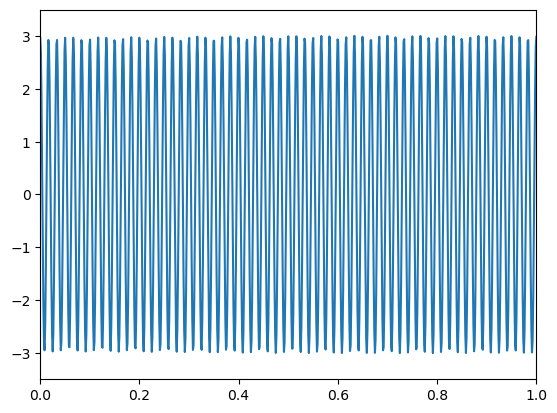

In [7]:

t = np.linspace(0,N_samples*dt,N_samples,endpoint=False)

plt.plot(t,fxr_filtered)
plt.xlim(0,1)
plt.ylim(-3.5,3.5)
